# Exercise 2

In [1]:
from thinkdsp import Signal, Sinusoid, SquareSignal, TriangleSignal, SawtoothSignal, ParabolicSignal
from thinkdsp import normalize, unbias, PI2, decorate
from thinkdsp import Chirp

import numpy as np

class MySawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts) - 1)
        
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        
        phases = np.cumsum(dphis)
        phases = np.insert(phases, 0, 0)
        
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        
#         ys = np.abs(frac - 0.5)
#         ys = normalize(unbias(ys), self.amp)
    
#         ys = self.amp * np.sign(unbias(frac))

        ys = self.amp * frac
        return ys

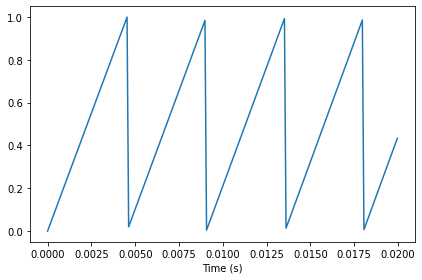

In [2]:
test_saw = MySawtoothChirp(start=220, end=440)
test_wave = test_saw.make_wave(duration=1, framerate=11025)
test_wave.segment(start=0, duration=0.02).plot() 
decorate(xlabel='Time (s)')

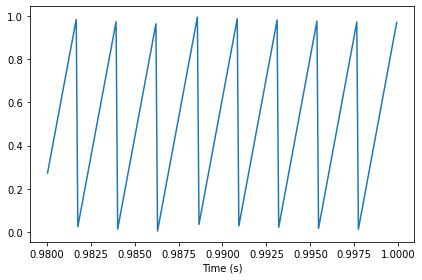

In [3]:
test_wave.segment(start=1-0.02, duration=0.02).plot()
decorate(xlabel='Time (s)')

In [4]:
test_wave.make_audio()

# Exercise 3

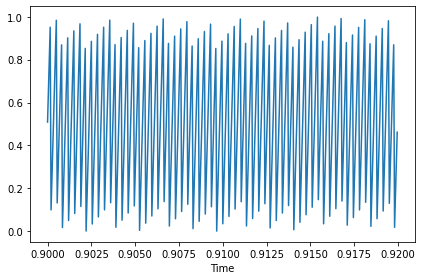

In [5]:
signal = MySawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20_000)
wave.segment(start=0.9, duration=0.02).plot()
decorate(xlabel='Time')

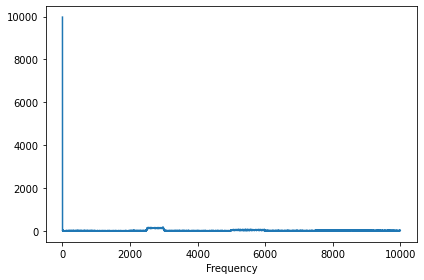

In [6]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency')

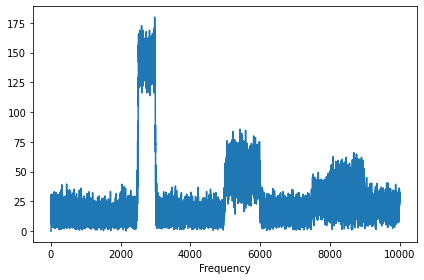

In [7]:
spectrum = wave.make_spectrum()
spectrum.high_pass(10)
spectrum.plot()
decorate(xlabel='Frequency')

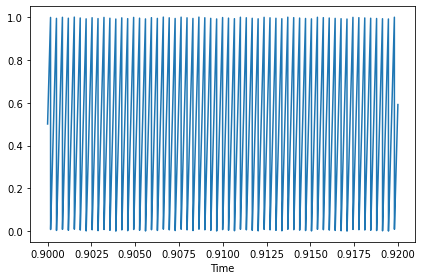

In [8]:
signal16 = MySawtoothChirp(start=2500, end=3000)
wave16 = signal.make_wave(duration=1, framerate=20_000*16)
wave16.segment(start=0.9, duration=0.02).plot()
decorate(xlabel='Time')

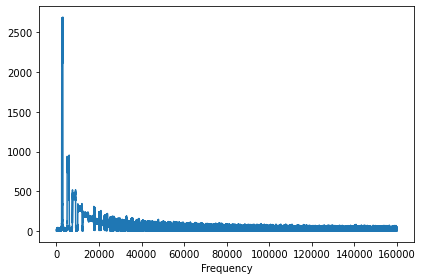

In [9]:
spectrum16 = wave16.make_spectrum()
spectrum16.high_pass(10)
spectrum16.plot()
decorate(xlabel='Frequency')

# Exercise 4

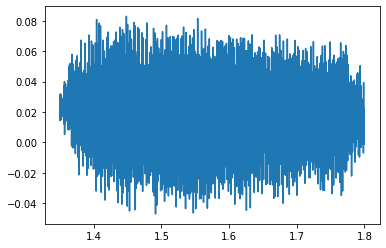

In [10]:
from thinkdsp import read_wave

wave = read_wave('Sounds/rhapblue11924.wav')
segment = wave.segment(start=1.35, duration=1.8-1.35)
segment.plot()

In [11]:
segment.make_audio()

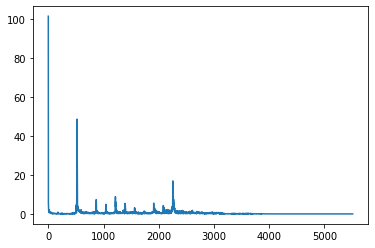

In [12]:
spectrum = segment.make_spectrum()
spectrum.plot()


# Exercise 5

In [82]:
class MyTromboneGliss(Chirp):
    def _get_frequency(self, ts):
        S, E = self.start, self.end
        
        # ts are normalized to [0,1]
        return E / (1 + ts * (E/S - 1))
    
    def evaluate(self, ts):
        l_C3, l_F3 = 2, 1
        
        freqs = self._get_frequency(1 - 2 * np.abs(ts[:-1] - 0.5))
        
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        
        phases = np.cumsum(dphis)
        phases = np.insert(phases, 0, 0)
        
        ys = self.amp * np.cos(phases)
        return ys

In [92]:
signal = MyTromboneGliss(start=262, end=349)
wave = signal.make_wave(duration=1, framerate=11025)

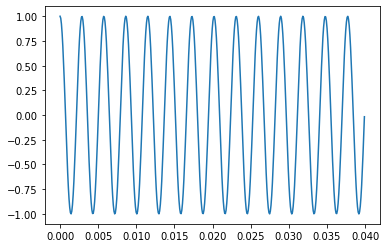

In [93]:
wave.segment(start=0, duration=0.04).plot()

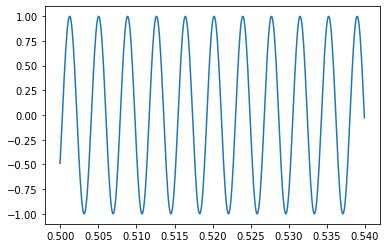

In [94]:
wave.segment(start=0.5, duration=0.04).plot()

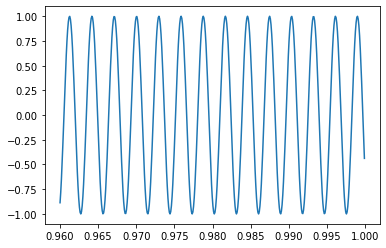

In [95]:
wave.segment(start=1-0.04, duration=0.04).plot()

In [96]:
wave.make_audio()

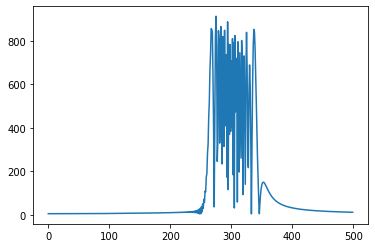

In [99]:
wave.make_spectrum().plot(high=500)

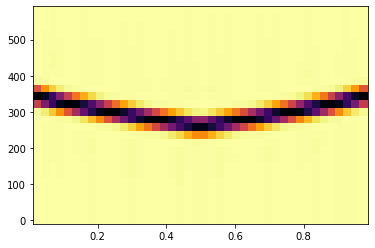

In [112]:
wave.make_spectrogram(512).plot(high=600)

# Exercise 6

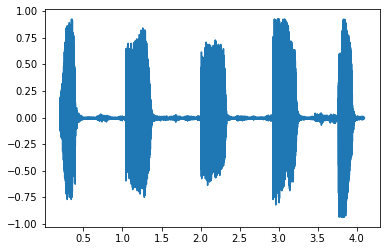

In [118]:
wave = read_wave('Sounds/523055__cbelloso__vocales-vowels-man-woman-kid-girl.wav')
segment = wave.segment(start=0.2, duration=3.9)
segment.plot()

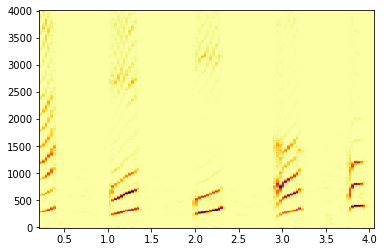

In [134]:
segment.make_spectrogram(512).plot()

In [135]:
from matplotlib import pyplot

sounds = [
    (0.2, 0.5),
    (1.1, 0.6),
    (2.0, 0.7),
    (2.9, 0.8),
    (3.6, 0.6),
]

def test_sound(start, duration):
    it = wave.segment(start=start, duration=duration)
    it.make_spectrum().plot()
    pyplot.show()
    return it.make_audio()

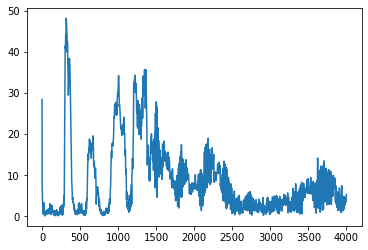

In [136]:
test_sound(sounds[0][0], sounds[0][1])

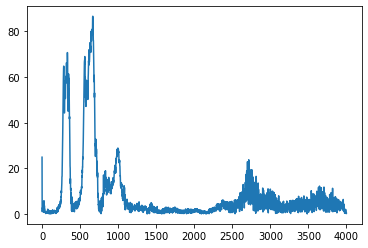

In [137]:
test_sound(sounds[1][0], sounds[1][1])

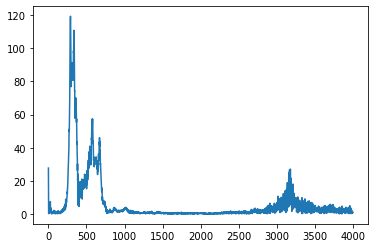

In [138]:
test_sound(sounds[2][0], sounds[2][1])

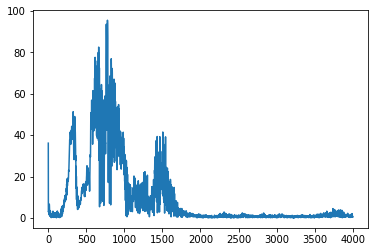

In [139]:
test_sound(sounds[3][0], sounds[3][1])

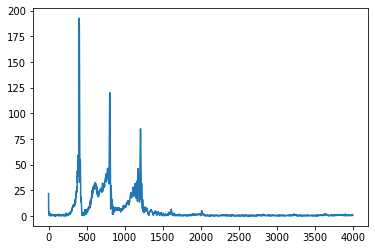

In [141]:
test_sound(sounds[4][0], sounds[4][1])